# Relax Inc

In [1]:
# import packages
import pandas as pd
import numpy as np

In [2]:
users = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
eng = pd.read_csv('takehome_user_engagement.csv', encoding='ISO-8859-1')

In [5]:
eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
eng.loc[:,'time_stamp'] = pd.to_datetime(eng.time_stamp)

In [8]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [9]:
eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
from datetime import datetime, timedelta

# created function to map adopted users
def is_adopted(x):
    if len(x) >= 3:
        x = [i for i in x]
        x.sort()
        x = [x[i+1] - x[i] for i in range(len(x)-2)]
        x = [1 for i in range(len(x)-2) if x[i] + x[i+1] + x[i+2] <= timedelta(days=7)]
        if 1 in x:
            return 1

In [11]:
# get adopted list
df = eng.groupby('user_id').agg(is_adopted) 
df.fillna(0, inplace=True)
df.columns = ['adopted']
df.head()

,adopted
user_id,
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0


In [12]:
df.adopted.value_counts()

0.0    7501
1.0    1322
Name: adopted, dtype: int64

In [13]:
users.set_index('object_id', inplace=True)
users = users.join(df, how='left')

In [14]:
users.head(20)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0.0
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,0.0
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,NaN
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,NaN


In [15]:
users.adopted.fillna(0, inplace=True)

In [16]:
users.head(20)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0.0
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,0.0
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0.0
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0.0


In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 10 columns):
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted                       12000 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.3+ MB


In [18]:
# it makes more sense to remove the columns with missing values than get rid of all the rows
# that are missing any values
# too much data would be lost
users = users.drop(labels=['last_session_creation_time', 'invited_by_user_id'], axis='columns')

In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 8 columns):
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
adopted                       12000 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.1+ MB


In [20]:
users.adopted.value_counts()

0.0    10678
1.0     1322
Name: adopted, dtype: int64

In [21]:
# extract target and features
features = users.drop(labels=['creation_time', 'name', 'email', 'adopted'], axis='columns')
target = users.adopted

In [22]:
# convert categorical variable
features = pd.get_dummies(features, columns=['creation_source'], drop_first=True)
feature_names = features.columns

In [23]:
features.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,,,,,,,
1,1,0,11,0,0,0,0
2,0,0,1,1,0,0,0
3,0,0,94,1,0,0,0
4,0,0,1,0,0,0,0
5,0,0,193,0,0,0,0


In [24]:
# normalize the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [25]:
# features = scaler.fit_transform(features)

In [26]:
features.shape

(12000, 7)

In [27]:
num_features = features.shape[1]

In [28]:
# import rfc classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [29]:
# split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, 
                                                    random_state=21, stratify=target)

In [30]:
# tune hyperparameters n_estimators and max_features
trees = [1, 11, 21, 31, 41]

max_f = [1, num_features, 'log2', 'sqrt']

param_grid = {'n_estimators': trees, 'max_features': max_f}

r_forest = RandomForestClassifier(class_weight='balanced', random_state=42)

r_forest_cv = GridSearchCV(r_forest, param_grid, cv=5)

r_forest_cv.fit(X_train, y_train)

n_est = r_forest_cv.best_params_['n_estimators']
n_feat = r_forest_cv.best_params_['max_features']

# print the best value(s) for each hyperparameter and the mean of the best validation score
print(r_forest_cv.best_params_, r_forest_cv.best_score_)

{'max_features': 7, 'n_estimators': 11} 0.7794047619047619


In [31]:
# build the model
rfc = RandomForestClassifier(n_estimators=n_est, max_features=n_feat, 
                             class_weight='balanced', random_state=42)

# fit the model
rfc.fit(X_train, y_train)

# generate predictions
y_pred = rfc.predict(X_test)

In [32]:
# print the accuracy
print('The training accuracy was: {}'.format(rfc.score(X_train, y_train)))
print('The test accuracy was: {}'.format(rfc.score(X_test, y_test)))

The training accuracy was: 0.8730952380952381
The test accuracy was: 0.7877777777777778


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve

In [34]:
# print the confusion matrix
print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
dr = tp / (tp + fn)
fpr = fp / (fp + tn)
print('True Negatives: {}'.format(tn))
print('False Positives: {}'.format(fp))
print('False Negatives: {}'.format(fn))
print('True Positives: {}'.format(tp))

[[2772  431]
 [ 333   64]]
True Negatives: 2772
False Positives: 431
False Negatives: 333
True Positives: 64


In [35]:
import matplotlib.pyplot as plt

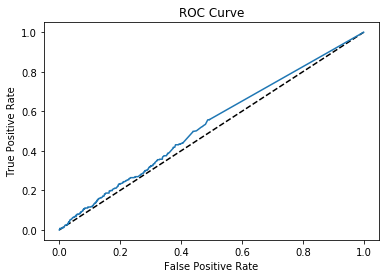

In [36]:
# generate probabilities for positive class
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# unpack into false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

_ = plt.plot([0,1], [0,1], 'k--')
_ = plt.plot(fpr, tpr)
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')

In [37]:
# compute the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.5302837154399488


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      3203
         1.0       0.13      0.16      0.14       397

    accuracy                           0.79      3600
   macro avg       0.51      0.51      0.51      3600
weighted avg       0.81      0.79      0.80      3600



## Initial Findings

The data in its current form does not do well at predicting adoption. The F1 score for the positive class was very low. Perhaps there are additional insights that can be derived if trying to include session info or invited by, but it is clear that the features used for this preliminary analysis were not effective for creating a predictive model for adoption.